## 当我们拿到一批原始的数据

- 首先要明确有多少特征，哪些是连续的，哪些是类别的。
- 检查有没有缺失值，对确实的特征选择恰当方式进行弥补，使数据完整。
- 对连续的数值型特征进行标准化，使得均值为0，方差为1。
- 对类别型的特征进行one-hot编码。
- 将需要转换成类别型数据的连续型数据进行二值化。
- 为防止过拟合或者其他原因，选择是否要将数据进行正则化。
- 在对数据进行初探之后发现效果不佳，可以尝试使用多项式方法，寻找非线性的关系。
- 根据实际问题分析是否需要对特征进行相应的函数转换。


    离市中心(km)    面积(m^2)    价格(万/m^2)
    0.5               200            4
    1                 130            3.5
    4                 210            2.5
    
    价格 =  a * 市中心距离 + b * 面积

因为面积的跨度一般可以从0 到 2-300, 而离市中心的距离跨度一般在10以内. 所以在这个公式中, b 只要稍稍变化一点, 他乘以面积的变化就会很大, 因为面积的值可以很大, 但是当a也变化那一点点时, 他对预测价格的影响力不会像 b 那样巨大. 这样的差别就会影响最终的工作效率.

所以, 我们要提高效率, 特征的标准化就可以帮上忙. 我们在机器学习训练之前, 先对数据预先处理一下, 取值跨度大的特征数据, 我们浓缩一下, 跨度小的括展一下, 使得他们的跨度尽量统一.

##  标准化：去均值，方差规模化

Standardization标准化:将特征数据的分布调整成标准正太分布，也叫高斯分布，也就是使得数据的均值维0，方差为1.

标准化的原因在于如果有些特征的方差过大，则会主导目标函数从而使参数估计器无法正确地去学习其他特征。

标准化的过程为两步：去均值的中心化（均值变为0）；方差的规模化（方差变为1）。

也叫z-score规范化（零均值规范化）。计算方式是将特征值减去均值，除以标准差。

$$x=	\frac	{x-	\bar	x}	\sigma$$

在sklearn.preprocessing中提供了**scale**和**StandarScaler**的方法，可以实现以上功能


In [1]:
from sklearn import preprocessing
import numpy as np

x = np.array([[1., -1., 2.],
              [2., 0., 0.],
              [0., 1., -1.]])

# 将每一列特征标准化为标准正太分布，注意，标准化是针对每一列而言的
x_scale = preprocessing.scale(x)
x_scale

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [2]:
type(x_scale)

numpy.ndarray

In [3]:
x_scale.shape

(3, 3)

In [4]:
# 可以查看标准化后的数据的均值与方差，已经变成0,1了
# axis=0 表示对每一列
x_scale.mean(axis=0)

array([0., 0., 0.])

In [5]:
# axis=1表示对每一行去做这个操作，axis=0表示对每一列做相同的这个操作
x_scale.mean(axis=1)

array([ 0.03718711,  0.31916121, -0.35634832])

In [6]:
# 同理，看一下标准差
x_scale.std(axis=0)

array([1., 1., 1.])

 preprocessing这个模块还提供了一个实用类**StandarScaler**，它可以在训练数据集上做了标准转换操作之后，把相同的转换应用到测试训练集中。

这是相当好的一个功能。可以对训练数据，测试数据应用相同的转换，以后有新的数据进来也可以直接调用，不用再重新把数据放在一起再计算一次了。


In [7]:
# 调用fit方法，根据已有的训练数据创建一个标准化的转换器
# 另外，StandardScaler()中可以传入两个参数：with_mean,with_std.这两个都是布尔型的参数，
# 默认情况下都是true,但也可以自定义成false.即不要均值中心化或者不要方差规模化为1.
scaler = preprocessing.StandardScaler()
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
# 使用上面这个转换器去转换训练数据x,调用transform方法
print(scaler.transform(x))
########################################
# 好了，比如现在又来了一组新的样本，也想得到相同的转换
new_x = [[-1., 1., 0.]]
scaler.transform(new_x)

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


array([[-2.44948974,  1.22474487, -0.26726124]])

### 总结

- sklearn.preprocessing.scale(X)

一般会把train和test集放在一起做标准化，或者在train集上做标准化后，用同样的标准化器去标准化test集，此时可以用scaler

- scaler = sklearn.preprocessing.StandardScaler().fit(train)
- scaler.transform(train)
- scaler.transform(test)

### 数据标准化对机器学习成效的影响

In [20]:
# 数据集分区，划分训练集和测试集
from sklearn.model_selection import train_test_split 
# 生成适合做classification数据集模块
from sklearn.datasets.samples_generator import make_classification
# svm模块
from sklearn.svm import SVC

In [21]:
x, y = make_classification(
    n_samples=300, n_features=2,
    n_redundant=0, n_informative=2, 
    random_state=22, n_clusters_per_class=1, 
    scale=100)

In [22]:
print(x.shape)
print(y.shape)

(300, 2)
(300,)


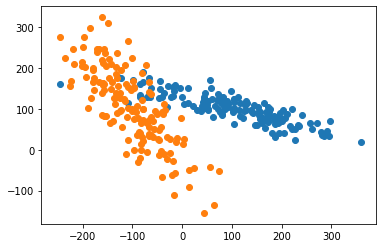

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x[y==0][:,0], x[y==0][:,1])
plt.scatter(x[y==1][:,0],x[y==1][:,1])
plt.show()

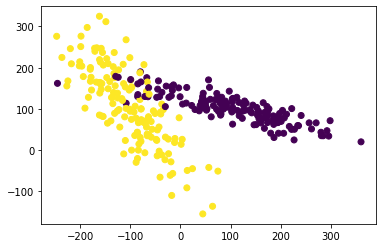

In [24]:
#可视化数据
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

数据标准化前模型准确率

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
svm = SVC()
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

D:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.4888888888888889

In [22]:
import warnings
warnings.filterwarnings('ignore')

#### 数据标准化

In [26]:
x = preprocessing.scale(x)

数据的单位发生了变化, X 数据也被压缩到差不多大小范围.

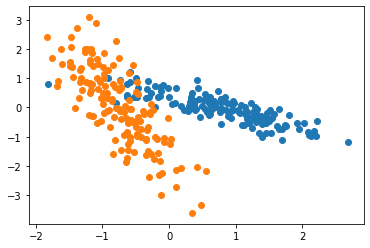

In [27]:
import matplotlib.pyplot as plt
plt.scatter(x[y==0][:,0], x[y==0][:,1])
plt.scatter(x[y==1][:,0],x[y==1][:,1])
plt.show()

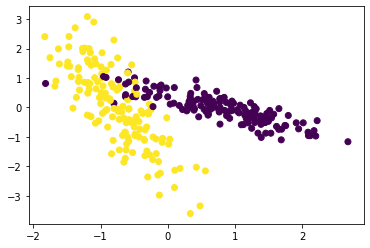

In [28]:
#可视化数据
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
svm = SVC()
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

D:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9444444444444444

标准化后的预测准确率提升至0.9

### 目的？提升模型收敛速度和模型精度

##  最小-最大规范化 MaxAbsScaler

原理与上面的很像，只是数据会被规模化到[-1,1]之间（也可以是其他固定最小最大值的区间）。也就是特征中，所有数据都会除以最大值。这个方法对那些已经中心化均值维0或者稀疏的数据有意义。

变换到[0,1]区间

    min_max_scaler = sklearn.preprocessing.MinMaxScaler()

    min_max_scaler.fit_transform(X_train)

In [28]:
# 在MinMaxScaler中是给定了一个明确的最大值与最小值。它的计算公式如下：
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std / (max - min) + min
# 以下这个例子是将数据规与[0,1]之间，每个特征中的最小值变成了0，最大值变成了1，请看：

x = np.array([[1., -1., 2.],
              [2., 0., 0.],
              [0., 1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
x_minmax = min_max_scaler.fit_transform(x)
x_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [29]:
# 同样的，如果有新的测试数据进来，也想做同样的转换咋办呢？请看：
x_test = np.array([[-3., -1., 4.]])
x_test_minmax = min_max_scaler.transform(x_test)
x_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

In [30]:
min_max_scaler2 = preprocessing.MinMaxScaler()
x_test_minmax2 = min_max_scaler.transform(x_test)
x_test_minmax2

array([[-1.5       ,  0.        ,  1.66666667]])

## 归一化（Normalization）

归一化(也称规范化、正则化)是将不同变化范围的值映射到相同的固定范围，常见的是[0,1]。

将每个样本变换成unit norm。

正则化是将样本在向量空间模型上的一个转换，经常被使用在分类与聚类中。

函数normalize 提供了一个快速有简单的方式在一个单向量上来实现这正则化的功能。正则化有l1,l2等，这些都可以用上：

    sklearn.preprocessing.normalize(X, norm='l2')

In [32]:
X = [[ 1, -1, 2],
     [ 2, 0, 0], 
     [ 0, 1, -1]]
preprocessing.normalize(X, norm='l2')

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

可以发现对于每一个样本都有，0.4^2+0.4^2+0.81^2=1,这就是L2 norm，

变换后每个样本的各维特征的平方和为1。类似地，L1 norm则是变换后每个样本的各维特征的绝对值和为1。

还有max norm，则是将每个样本的各维特征除以该样本各维特征的最大值。

在度量样本之间相似性时，如果使用的是二次型kernel，需要做Normalization

In [34]:
preprocessing.normalize(X,axis=0,norm='l2')

array([[ 0.4472136 , -0.70710678,  0.89442719],
       [ 0.89442719,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.4472136 ]])

In [33]:
preprocessing.normalize(X, norm='l1')

array([[ 0.25, -0.25,  0.5 ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.5 , -0.5 ]])

preprocessing这个模块还提供了一个实用类Normalizer,实用transform方法同样也可以对新的数据进行同样的转换

In [36]:
x = np.array([[1., -1., 2.],
              [2., 0., 0.],
              [0., 1., -1.]])
# 根据训练数据创建一个正则器
normalizer = preprocessing.Normalizer().fit(x)
print(normalizer)
####################################################################
# 对训练数据进行正则
print(normalizer.transform(x))
###################################################################
# 对新的测试数据进行正则
print(normalizer.transform([[-1., 1., 0.]]))
# normalize和Normalizer都既可以用在密集数组也可以用在稀疏矩阵（scipy.sparse)中
# 对于稀疏的输入数据，它会被转变成维亚索的稀疏行表征（具体请见scipy.sparse.csr_matrix)
###################################################################################


Normalizer(copy=True, norm='l2')
[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]
[[-0.70710678  0.70710678  0.        ]]


## 二值化–特征的二值化

特征的二值化是指将数值型的特征数据转换成布尔类型的值。可以使用实用类Binarizer。

    sklearn.preprocessing.Binarizer(threshold=1)

说白了：给定阈值，将特征转换为0/1。

与标准化处理类似，scikit-learn有两种方法二元特征：

    preprocessing.binarize （一个函数）
    preprocessing.Binarizer （一个类）

In [38]:
binarizer = preprocessing.Binarizer(threshold=1.1)

X = np.array([[0.9, -1., 2.],
              [2., 0., 0.],
              [0., 1.2, -1.]])

binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [42]:
from sklearn import datasets
boston = datasets.load_boston()
boston.target[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [45]:
boston.target.shape

(506,)

In [44]:
boston.target.mean()

22.532806324110677

In [ ]:
# 直接处理boston.target会报错：using array.reshape(-1, 1)
# new_target = preprocessing.binarize(boston.target,threshold=boston.target.mean())

In [47]:
target = boston.target.reshape(-1,1)
target.shape

(506, 1)

In [49]:
new_target = preprocessing.binarize(target, threshold=boston.target.mean())
new_target[0:10]

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]])

## 二值化-标签二值化（Label binarization）

    sklearn.preprocessing.LabelBinarizer()

对于标称型数据来说，preprocessing.LabelBinarizer是一个很好用的工具。比如可以把yes和no转化为0和1，或是把incident和normal转化为0和1。当然，对于两类以上的标签也是适用的。这里举一个简单的例子，说明将标签二值化以及其逆过程。

In [51]:
from sklearn import preprocessing
from sklearn import tree

# help(preprocessing.LabelBinarizer)#取消注释可以查看详细用法

# 特征矩阵
featureList=[[1,0],[1,1],[0,0],[0,1]]
# 标签矩阵
labelList=['yes', 'no', 'no', 'yes']
# 将标签矩阵二值化
lb = preprocessing.LabelBinarizer()
dummY=lb.fit_transform(labelList)
# print(dummY)
# 模型建立和训练
clf = tree.DecisionTreeClassifier()
clf = clf.fit(featureList, dummY)
p=clf.predict([[0,1]])
# print(p)#取消注释可以查看p的值

# 逆过程
yesORno=lb.inverse_transform(p)
print(yesORno)

['yes']


## 类别特征编码(OneHotEncoder独热编码)

    sklearn.preprocessing.OneHotEncoder
    
    OneHotEncoder(n_values=’auto’,  categorical_features=’all’,  
    dtype=<class ‘numpy.float64’>,  sparse=True,  handle_unknown=’error’)

直观来说就是有多少个状态就有多少比特，而且只有一个比特为1，其他全为0的一种码制。

举例如下：     假如有三种颜色特征：红、黄、蓝。 在利用机器学习的算法时一般需要进行向量化或者数字化。

那么你可能想令 红=1，黄=2，蓝=3. 那么这样其实实现了标签编码，即给不同类别以标签。

然而这意味着机器可能会学习到“红<黄<蓝”，但这并不是我们的让机器学习的本意，只是想让机器区分它们，并无大小比较之意。

所以这时标签编码是不够的，需要进一步转换。因为有三种颜色状态，所以就有3个比特。

即红色：1 0 0 ，黄色: 0 1 0，蓝色：0 0 1 。
    
如此一来每两个向量之间的距离都是根号2，在向量空间距离都相等，所以这样不会出现偏序性，基本不会影响基于向量空间度量算法的效果。    

自然状态码为：000,001,010,011,100,101    

独热编码为：000001,000010,000100,001000,010000,100000 


In [31]:
from sklearn.preprocessing import  OneHotEncoder

enc = OneHotEncoder()
enc.fit([[0, 0, 3],
         [1, 1, 0],
         [0, 2, 1],
         [1, 0, 2]])

ans = enc.transform([[0, 1, 3]]).toarray()  
# 如果不加 toarray() 的话，输出的是稀疏的存储格式，即索引加值的形式，
# 也可以通过参数指定 sparse = False 来达到同样的效果
print(ans) # 输出 [[ 1.  0.  0.  1.  0.  0.  0.  0.  1.]]

[[1. 0. 0. 1. 0. 0. 0. 0. 1.]]


D:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [32]:
enc = OneHotEncoder(sparse=False)
enc.fit([[0, 0, 3],
         [1, 1, 0],
         [0, 2, 1],
         [1, 0, 2]])
enc.transform([[0, 1, 3]]) # 看下面解释

D:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., 1., 0., 0., 0., 0., 1.]])

上面这个例子，第一维特征有两种值0和1，用两位去编码。第二维用三位，第三维用四位。

下面解释输出结果的意思。对于输入数组，这依旧是把每一行当作一个样本，每一列当作一个特征，

- 我们先来看第一个特征，即第一列 [0,1,0,1]，也就是说它有两个取值 0 或者 1，那么 one-hot 就会使用两位来表示这个特征，[1,0] 表示 0， [0,1] 表示 1，在上例输出结果中的前两位 [1,0...] 也就是表示该特征为 0
- 第二个特征，第二列 [0,1,2,0]，它有三种值，那么 one-hot 就会使用三位来表示这个特征，[1,0,0] 表示 0， [0,1,0] 表示 1，[0,0,1] 表示 2，在上例输出结果中的第三位到第六位 [...0,1,0,0...] 也就是表示该特征为 1
- 第二个特征，第三列 [3,0,1,2]，它有四种值，那么 one-hot 就会使用四位来表示这个特征，[1,0,0,0] 表示 0， [0,1,0,0] 表示 1，[0,0,1,0] 表示 2，[0,0,0,1] 表示 3，在上例输出结果中的最后四位 [...0,0,0,1] 也就是表示该特征为 3
- (onehotencode)[https://www.cnblogs.com/zhoukui/p/9159909.html]

## 标签编码（Label encoding）

LabelEncoder可以将值转换为0~n-1个类型，也可以用来将非数值的标签转换为数值标签（需要确保非数值标签是可比的和可哈希的）

In [65]:
le = preprocessing.LabelEncoder()
le.fit([1, 2, 2, 6])
le.transform([1, 1, 2, 6]) #array([0, 0, 1, 2])


array([0, 0, 1, 2], dtype=int64)

In [66]:
#非数值型转化为数值型
le.fit(["paris", "paris", "tokyo", "amsterdam"])
le.transform(["tokyo", "tokyo", "paris"]) #array([2, 2, 1])

array([2, 2, 1], dtype=int64)

### 总结

梳理过后，三个转换量的区别就比较明显了：

描述

- LabelEncoder ：将类型变量转换为数值组成的数组。
- OneHotEncoder：将数值类型属性转换成独热编码的数值型数组。
- LabelBinerizer： 将标签二值化为一对多的形式。


fit_transform的输入

- LabelEncoder ：pd.Series/np.array, 可哈希、可比的非数值或者数值, ndim=1。
- OneHotEncoder：np.array，可比的非数值或者数值，ndim=2。
- LabelBinerizer： pd.Series/np.array, 可哈希、可比的非数值或者数值，ndim=1。


fit_transform的默认输出

- LabelEncoder ：np.array, dtype=int64。
- OneHotEncoder：SciPy.Sparse Matrix, dtype=float64。
- LabelBinerizer： np.array, dtype=int32。



## 特征中含异常值

    sklearn.preprocessing.robust_scale

## 生成多项式特征

这个其实涉及到特征工程了，多项式特征/交叉特征。

有的时候线性的特征并不能做出美的模型，于是我们会去尝试非线性。非线性是建立在将特征进行多项式地展开上的。

比如将两个特征 (X_1, X_2)，它的平方展开式便转换成5个特征(1, X_1, X_2, X_1^2, X_1X_2, X_2^2). 

代码案例如下：

In [71]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
 
# 自建一组3*2的样本
x = np.arange(6).reshape(3, 2)
# 创建2次方的多项式
# 比如将两个特征 (X_1, X_2)，它的平方展开式便转换成5个特征(1, X_1, X_2, X_1^2, X_1X_2, X_2^2). 代码案例如下：
poly = PolynomialFeatures(2)
poly.fit_transform(x)


array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [72]:
# 也可以自定义选择只要保留特征相乘的项。 
# 即将 (X_1, X_2, X_3) 转换成 (1, X_1, X_2, X_3, X_1X_2, X_1X_3, X_2X_3, X_1X_2X_3).
x = np.arange(9).reshape(3, 3)
 
poly = PolynomialFeatures(degree=3, interaction_only=True)
poly.fit_transform(x)

array([[  1.,   0.,   1.,   2.,   0.,   0.,   2.,   0.],
       [  1.,   3.,   4.,   5.,  12.,  15.,  20.,  60.],
       [  1.,   6.,   7.,   8.,  42.,  48.,  56., 336.]])

In [73]:
# 7 自定义特征的转换函数
# 通俗的讲，就是把原始的特征放进一个函数中做转换，这个函数出来的值作为新的特征。
# 比如说将特征数据做log转换，做倒数转换等等。
# FunctionTransformer 可以实现这个功能
import numpy as np
from sklearn.preprocessing import FunctionTransformer
 
transformer = FunctionTransformer(np.log1p)
 
x = np.array([[0, 1], [2, 3]])
 
transformer.transform(x)

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

In [68]:
X = np.array([[1., -1., 2.],
              [2., 0., 0.],
              [0., 1., -1.]])

poly = preprocessing.PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  1., -1.,  2.,  1., -1.,  2.,  1., -2.,  4.],
       [ 1.,  2.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  1., -1.,  0.,  0., -0.,  1., -1.,  1.]])

## 处理缺失值

在scikit-learn的模型中都是假设输入的数据是数值型的，并且都是有意义的，如果有缺失数据是通过NAN，或者空值表示的话，就无法识别与计算了。

要弥补缺失值，可以使用均值，中位数，众数等等。Imputer这个类可以实现。

In [69]:

import numpy as np
from sklearn.preprocessing import Imputer
 
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit([[1, 2], [np.nan, 3], [7, 6]])


Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [70]:
x = [[np.nan, 2], [6, np.nan], [7, 6]]
imp.transform(x)

array([[4.        , 2.        ],
       [6.        , 3.66666667],
       [7.        , 6.        ]])